## **Exploratory Data Analysis**  

#### **Import Libraries**

In [3]:
#Data-set Analysis libraries
import pandas as pd
import numpy as np
from collections import Counter

#Data-set Visualization libraries
import matplotlib .pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import seaborn as sns

#Warnings
import warnings
warnings.filterwarnings('ignore')

#### **Dataset Loading**

In [5]:
#Load Dataset
data=pd.read_csv('swiggy.csv')
data.head(5)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [6]:
#No. of rows and columns in Dataset
print(f'Number of Rows in Dataset : {data.shape[0]}')
print(f'Number of Columns in Dataset : {data.shape[1]}')


Number of Rows in Dataset : 8680
Number of Columns in Dataset : 10


In [7]:
#Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


#### **Data Wrangling Process**

#### Missing Values

In [10]:
#No. of missing values in Dataset
data.isna().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

In [11]:
data.groupby('Price')['Restaurant'].nunique().head(15)

Price
0.0      5
1.0      4
2.0      2
5.0      1
10.0     2
15.0     1
20.0     2
30.0     2
40.0     3
45.0     1
48.0     1
49.0     1
50.0    10
60.0     2
65.0     1
Name: Restaurant, dtype: int64

There are certain restaurant entries reflected prices below 50.0 which is unlikely in real market conditions.So, to preserve the accuracy and consistency of the dataset these values must be adjust to 50.0.



In [13]:
data.loc[data['Price']<50.0,'Price']=50.0

The restaurant prices are in continuous numerical values .We can convert it into categorical variable by converting them into different categories (i.e..Price range).

In [15]:
#Binning method
bins=[0.0,300.0,600.0,1000.0,1500.0]
labels=['0-300','300-600','600-1000','1000-1500']
data['Price Range']=pd.cut(data['Price'],bins=bins,labels=labels)
data.head(5)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time,Price Range
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59,0-300
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56,0-300
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50,600-1000
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57,0-300
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63,300-600


Similarly we can create an additional column representing the corresponding region of india by using 'City' column to enable more structured analysis and facilitate regional comparisons.

In [17]:
def transform(city):
    if city in['Bangalore','Hyderabad','Chennai']:
        return 'South India'
    elif city in['Kolkata']:
        return 'East India'
    elif city in ['Mumbai','Pune','Ahmedabad','Surat']:
        return 'West India'
    else:
        return 'North India'

data['Region_of_india']=data['City'].apply(transform)
data.head(5)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time,Price Range,Region_of_india
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59,0-300,South India
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56,0-300,South India
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50,600-1000,South India
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57,0-300,South India
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63,300-600,South India


#### **Feature Engineering**

In order to conduct a more comprehensive analysis of popularity, one additional feature representing number of reviews must have to introduced.As Avg ratings provides insights into the perceived quality of an item, it does not capture the extent of user engagement. For example, a restaurant with an average rating of 4.5 based on only 5 reviews cannot be considered equally popular as one with the same average rating derived from 5,000 reviews. Therefore, the number of reviews serves as a crucial popularity metric, reflecting both customer reach and interaction.Number of reviews can be calculate by the formula:                                                                                                                        
###### $No. of  reviews=Total ratings \div Avg ratings$                                                                                                        
This transformation ensures that the dataset not only reflects quality through average ratings but also incorporates volume-based popularity, enabling a more reliable and interpretable analysis.
                     

In [20]:
data['Number of reviews']=data['Total ratings']/data['Avg ratings']
data.head(5)

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time,Price Range,Region_of_india,Number of reviews
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59,0-300,South India,22.727273
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56,0-300,South India,24.390244
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50,600-1000,South India,22.727273
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57,0-300,South India,128.205128
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63,300-600,South India,12.500000


In [21]:
#Dataset Description
data.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time,Number of reviews
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.541244,3.655104,156.634793,53.967051,40.978382
std,158671.617188,230.805935,0.647629,391.448014,14.292335,95.793554
min,211.000000,50.000000,2.000000,20.000000,20.000000,4.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000,12.820513
50%,283442.000000,300.000000,3.900000,80.000000,53.000000,27.586207
75%,393425.250000,400.000000,4.200000,100.000000,64.000000,27.586207
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000,2564.102564


In [22]:
#function to apply styling to each chart
def applystyle(ax,fig,logo_path='swiggy_logo.png'):
    fig.patch.set_facecolor('oldlace')
    ax.set_facecolor('oldlace')
    
    logo=mpimg.imread(logo_path)
    logo_ax=fig.add_axes([2.2,1.0,0.2,0.3])
    logo_ax.imshow(logo)
    logo_ax.axis('off')


In [23]:
data[data['City'].duplicated(keep=False)]

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time,Price Range,Region_of_india,Number of reviews
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59,0-300,South India,22.727273
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56,0-300,South India,24.390244
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50,600-1000,South India,22.727273
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57,0-300,South India,128.205128
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63,300-600,South India,12.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8675,464626,Panjarapole Cross Road,Ahmedabad,Malt Pizza,500.0,2.9,80,Pizzas,Navrangpura,40,300-600,West India,27.586207
8676,465835,Rohini,Delhi,Jay Mata Ji Home Kitchen,200.0,2.9,80,South Indian,Rohini,28,0-300,North India,27.586207
8677,465872,Rohini,Delhi,Chinese Kitchen King,150.0,2.9,80,"Chinese,Snacks,Tandoor",Rohini,58,0-300,North India,27.586207
8678,465990,Rohini,Delhi,Shree Ram Paratha Wala,150.0,2.9,80,"North Indian,Indian,Snacks",Rohini,28,0-300,North India,27.586207


#### Univariate Analysis

##### **1.Price Distribution by using KDE Plot**

Analyzing the price distribution of restaurants  provides valuable insights into customer affordability patterns, enabling Swiggy to optimize pricing strategies, enhance restaurant recommendations, and better align promotional offers with the spending capacity of its diverse user base

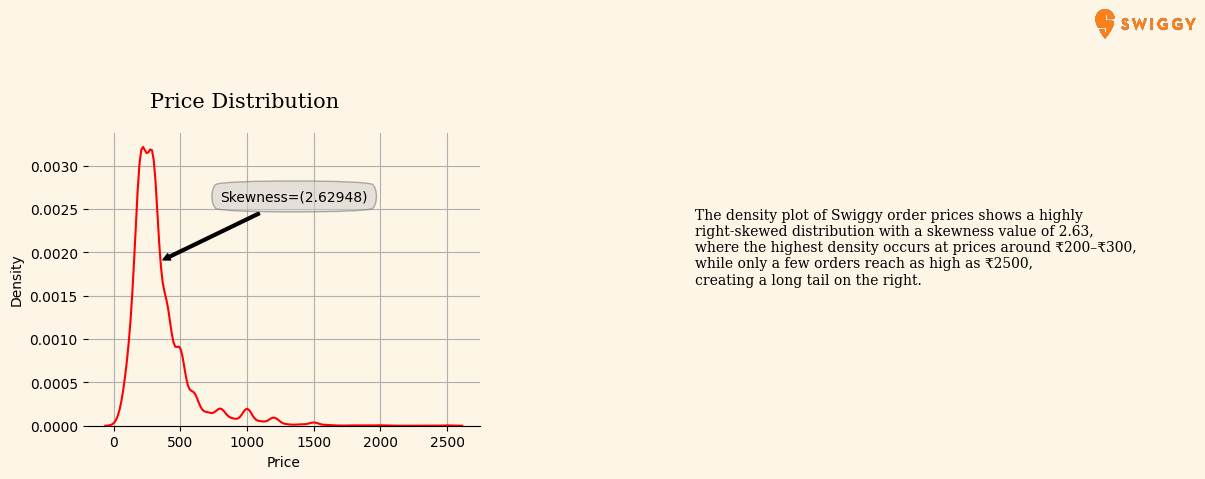

In [27]:
#chart-1
fig,ax=plt.subplots(1,1,figsize=(5,4))

#KDE-plot
ax=sns.kdeplot(data=data,x='Price',color='red')

#Skewness calculation
r1=data['Price'].skew()

#annotation of skewness value in the graph
arrowprops=dict(facecolor='black',arrowstyle='simple')
bbox=dict(boxstyle='round4,pad=0.7',fc='0.8',alpha=0.5,ec='0.4')
ax.annotate('Skewness=(%.5f)'%(r1),xy=(350,0.0019),arrowprops=arrowprops,xytext=(800,0.0026),bbox=bbox)

#Insights
fig.text(1.4,0.5,'''The density plot of Swiggy order prices shows a highly
right-skewed distribution with a skewness value of 2.63,
where the highest density occurs at prices around ₹200–₹300,
while only a few orders reach as high as ₹2500, 
creating a long tail on the right. ''',fontsize=10,fontfamily='serif')

ax.grid(True)

for spine in['top','right','left']:
        ax.spines[spine].set_visible(False)
fig.suptitle('Price Distribution',fontsize=15,fontfamily='serif')

#apply styling
applystyle(ax=ax,fig=fig)
plt.tight_layout()    
plt.show()

##### 2.Price Range Distribution by using Countplot

##### Studying the distribution of restaurant price ranges in the Swiggy dataset helps identify the most common affordability segments, allowing Swiggy to tailor its offerings, balance restaurant partnerships across budget-friendly and premium categories, and design targeted marketing campaigns for different customer groups

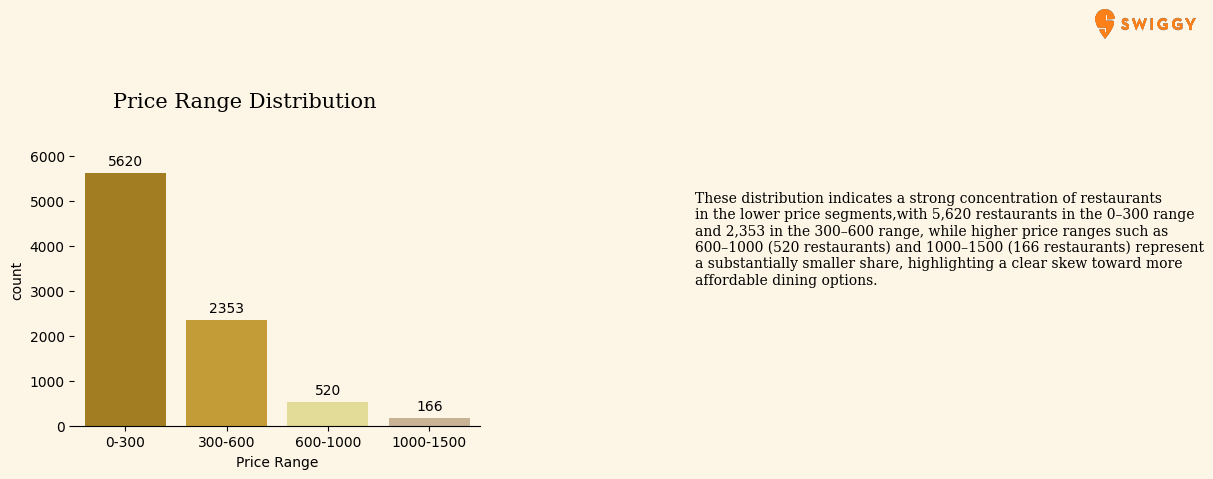

In [30]:
#chart-2
fig,ax=plt.subplots(1,1,figsize=(5,4))

#color palette 
palette=['darkgoldenrod','goldenrod','khaki','tan']

#Count=plot
ax=sns.countplot(data=data,x='Price Range',palette=palette)
ax.set_ylim(0,6500)

#value counts on each patches
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() + p.get_width()/2,height+100,f'{int(height)}',ha='center',va='bottom',fontsize=10,color='black',fontstyle='normal')

#Insights
fig.text(1.4,0.5,'''These distribution indicates a strong concentration of restaurants
in the lower price segments,with 5,620 restaurants in the 0–300 range
and 2,353 in the 300–600 range, while higher price ranges such as 
600–1000 (520 restaurants) and 1000–1500 (166 restaurants) represent
a substantially smaller share, highlighting a clear skew toward more 
affordable dining options.''',fontsize=10,fontfamily='serif') 

#Title
fig.suptitle('Price Range Distribution',fontsize=15,fontfamily='serif')

for spine in['top','right','left']:
        ax.spines[spine].set_visible(False)

#apply styling
applystyle(ax=ax,fig=fig)
plt.tight_layout()    
plt.show()

##### **3.Region Distribution by using Countplot**

Analyzing the region-wise distribution of restaurants in the Swiggy dataset reveals geographic concentration and market penetration, which helps Swiggy identify high-demand areas, strengthen delivery networks, and strategically expand into underrepresented regions.

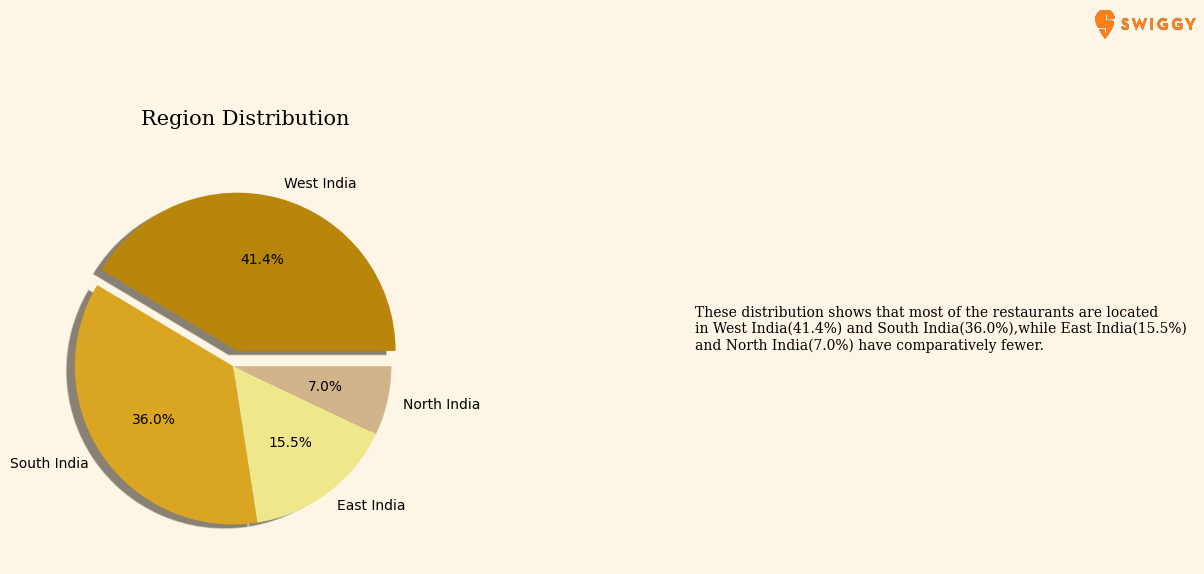

In [33]:
#chart-3

fig,ax=plt.subplots(1,1,figsize=(5,5))

#Color palette
palette=['darkgoldenrod','goldenrod','khaki','tan']
explode=(0.1,0.0,0.0,0.0)
shadow=dict(ox=-0.04,edgecolor='oldlace',shade=0.9)
d=data['Region_of_india'].value_counts().reset_index()

#Pie-chart
ax.pie(d['count'],labels=d['Region_of_india'],colors=palette,explode=explode,autopct='%1.1f%%',shadow=shadow)

#Insights
fig.text(1.4,0.5,'''These distribution shows that most of the restaurants are located
in West India(41.4%) and South India(36.0%),while East India(15.5%)
and North India(7.0%) have comparatively fewer.''',fontsize=10,fontfamily='serif')

#Title
fig.suptitle('Region Distribution',fontsize=15,fontfamily='serif')

#apply styling
applystyle(ax=ax,fig=fig)

plt.tight_layout()    
plt.show()

#### Bivariate Analysis

##### **4.Analysis of City and Price Range using Heatmap**

Examining the distribution of restaurant price ranges across different cities  highlights variations in customer affordability and dining preferences, enabling Swiggy to customize pricing strategies, partner with restaurants that match local demand, and design city-specific promotional campaigns.

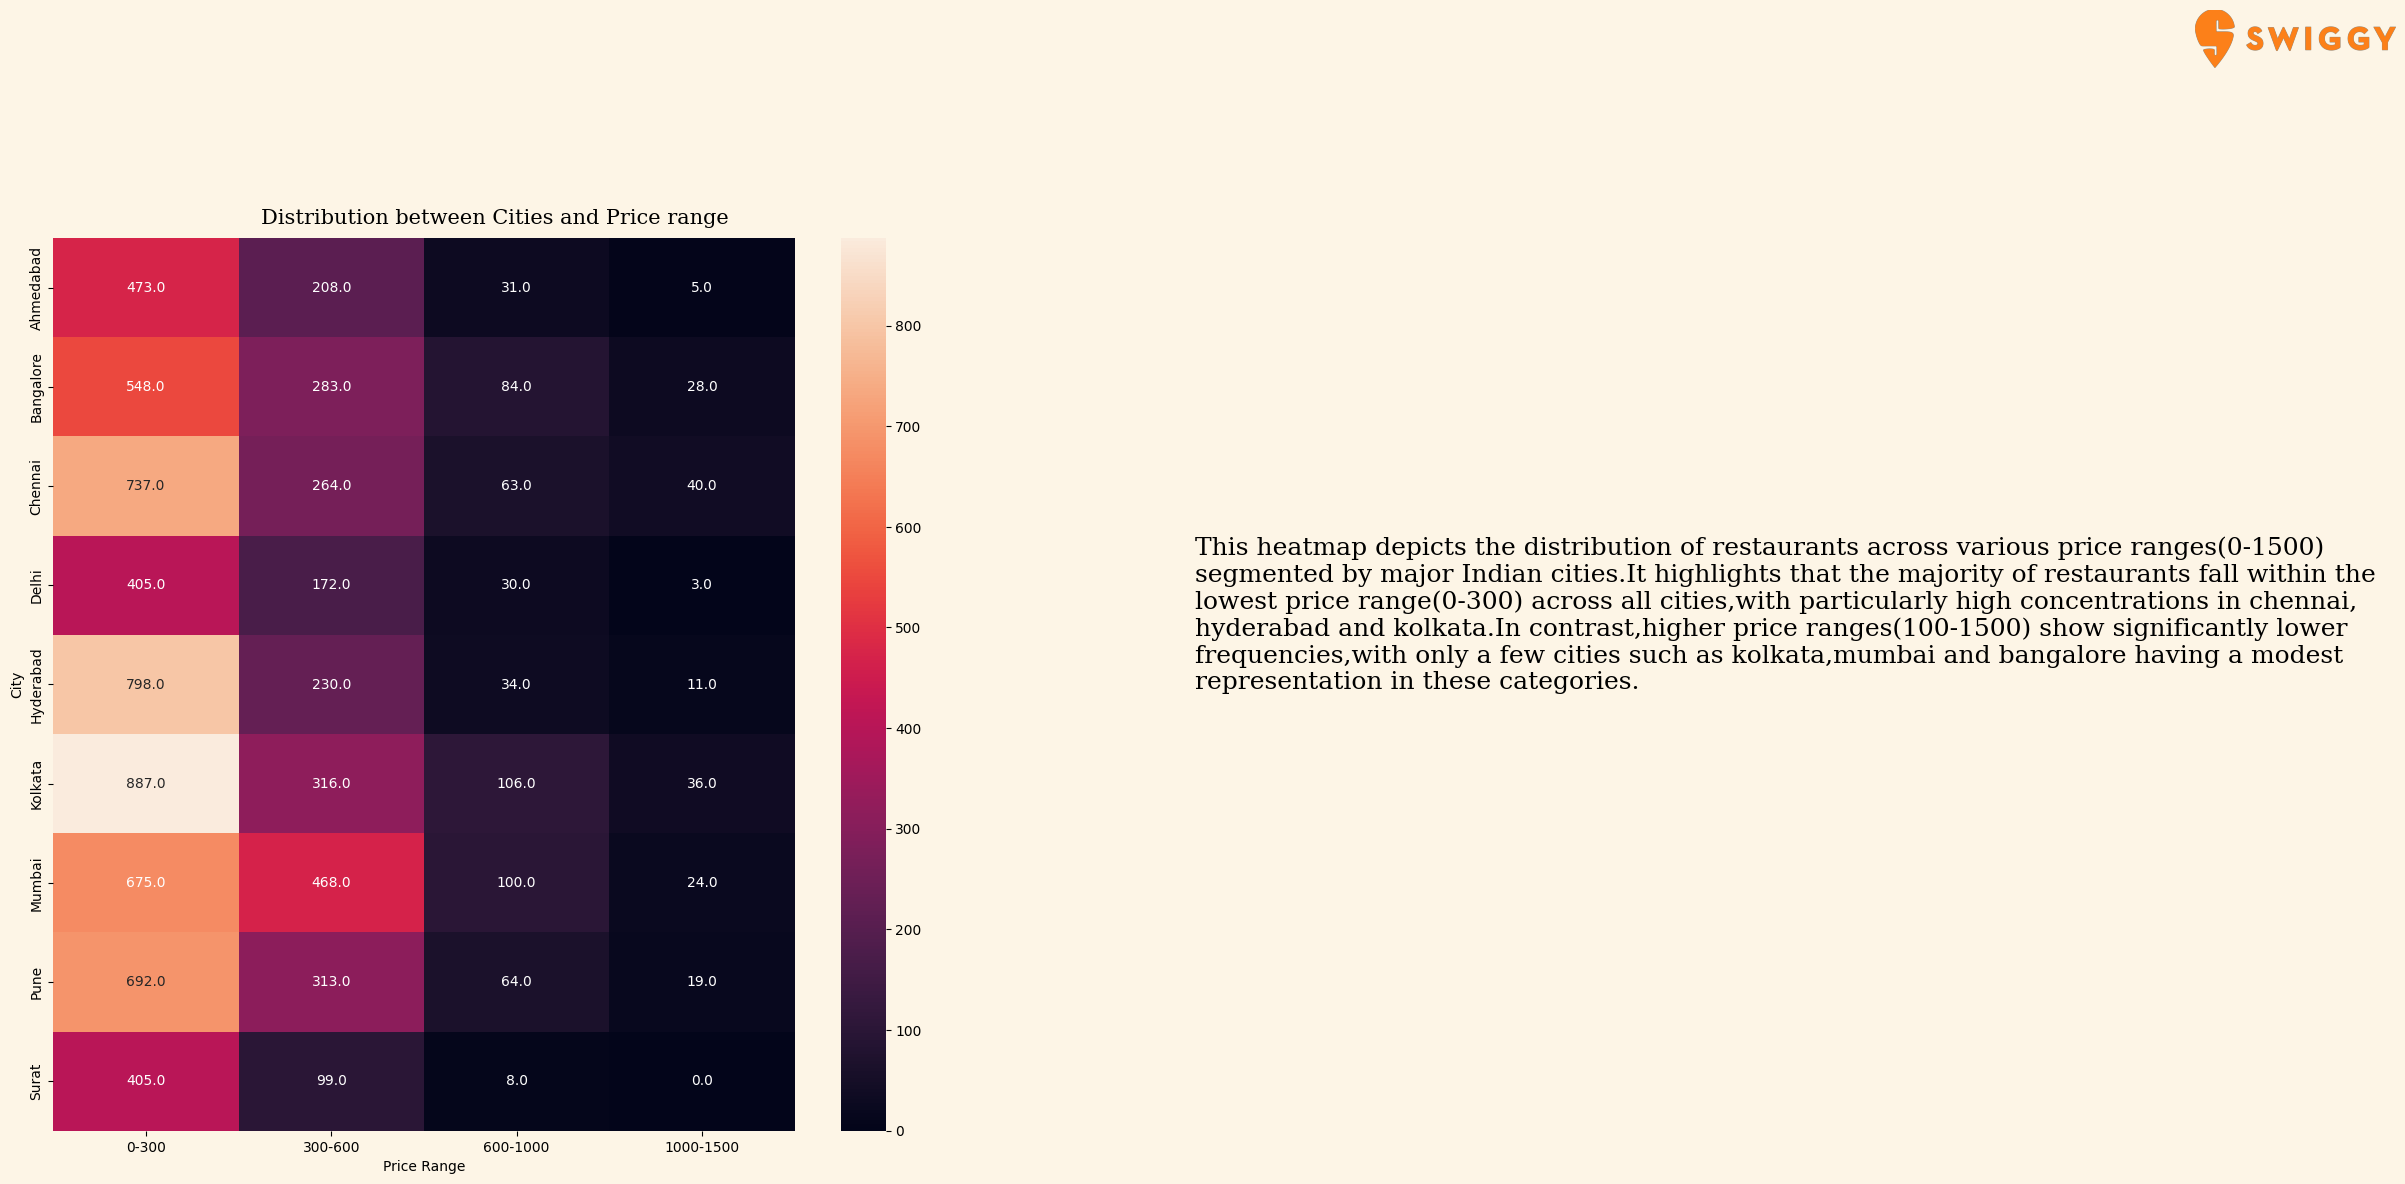

In [37]:
#chart-4
fig,ax=plt.subplots(1,1,figsize=(10,10))

#Heatmap
ax=sns.heatmap(pd.crosstab(data['City'],data['Price Range']),annot=True,fmt='.1f')

#Insights
fig.text(1.2,0.5,'''This heatmap depicts the distribution of restaurants across various price ranges(0-1500)
segmented by major Indian cities.It highlights that the majority of restaurants fall within the 
lowest price range(0-300) across all cities,with particularly high concentrations in chennai,
hyderabad and kolkata.In contrast,higher price ranges(100-1500) show significantly lower
frequencies,with only a few cities such as kolkata,mumbai and bangalore having a modest
representation in these categories.''',fontsize=18,fontfamily='serif')

#Insights
fig.suptitle('Distribution between Cities and Price range',fontsize=15,fontfamily='serif')

#apply styling
applystyle(ax=ax,fig=fig)

plt.tight_layout()    
plt.show()

##### **5.Analysis between City and Delivery Time using Polar Bar plot**

A detailed analysis of delivery time distribution across cities in the Swiggy not only reveals differences in average delivery durations but also uncovers hidden patterns influenced by factors such as restaurant density, traffic congestion, urban infrastructure, and peak order hours. These insights allow Swiggy to identify cities facing consistent delivery delays, benchmark performance against faster cities, and implement targeted operational improvements such as dynamic rider allocation, optimized restaurant clustering, and AI-driven route planning. By leveraging this city-wise delivery performance data, Swiggy can enhance service reliability, reduce waiting times, and ultimately strengthen customer trust and loyalty.

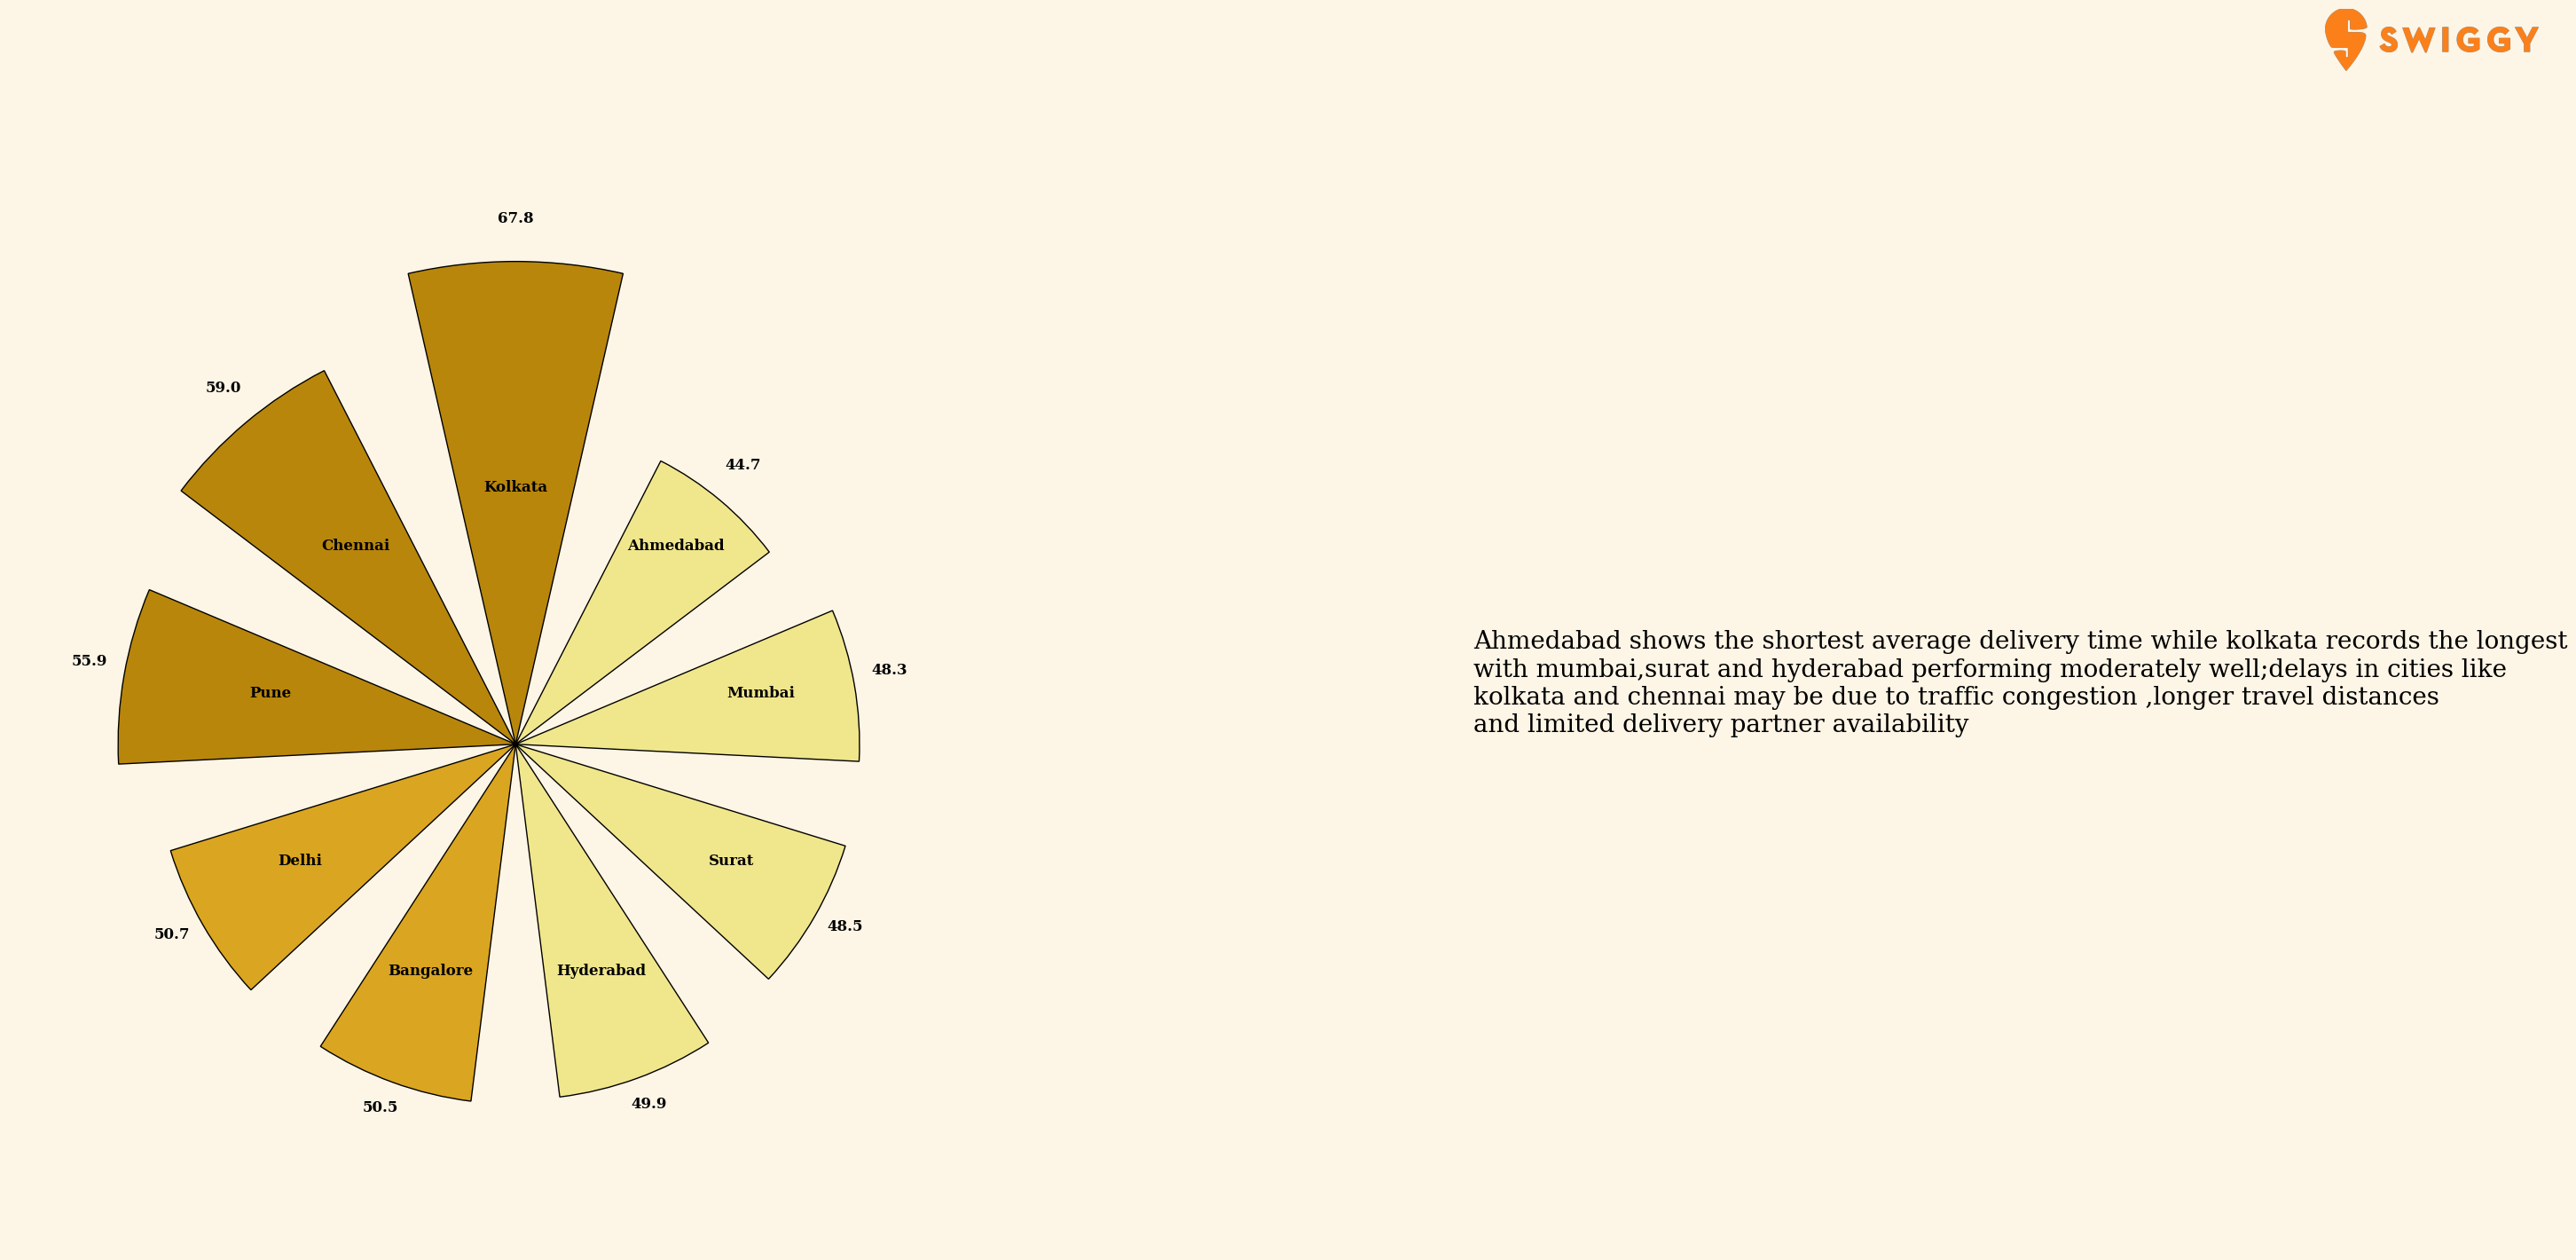

In [40]:
#chart-5
fig,ax=plt.subplots(figsize=(12,12),subplot_kw={'projection':'polar'})
#Groupby City column
dt=data.groupby('City')['Delivery time'].mean().sort_values(ascending=False)
num=len(dt)
angles=np.linspace(0,2*np.pi,num,endpoint=False).tolist()
width=np.pi/num+0.1
ax.axis('off')

for angle,value,city_name in zip(angles,dt,dt.index):
    #Label delivery time 
    delivery_time_label=f'{value:.1f}'
    #Change color according to Delivery time values
    if value>55.0:
        bar_color='darkgoldenrod'

    elif value>50.0 and value<55.0:
        bar_color='goldenrod'

    else:
        bar_color='khaki'
    #Bar plot
    ax.bar(angle,value,width=width,color=bar_color,edgecolor='black')
    ax.text(angle,35,city_name,ha='center',va='bottom',fontsize=12,fontfamily='serif',color='black',fontweight='bold')
    ax.text(angle,value+5.0,delivery_time_label,ha='center',va='bottom',fontsize=12,fontfamily='serif',color='black',fontweight='bold')

ax.set_theta_offset(np.pi/2)
ax.set_theta_direction('counterclockwise')
ax.set_xticks(angles)
ax.set_xticklabels(dt.index,fontsize=10,fontfamily='serif')

#Insights.
fig.text(1.4,0.5,'''Ahmedabad shows the shortest average delivery time while kolkata records the longest
with mumbai,surat and hyderabad performing moderately well;delays in cities like 
kolkata and chennai may be due to traffic congestion ,longer travel distances
and limited delivery partner availability''',fontsize=20,fontfamily='serif')

#Apply styling
applystyle(ax=ax,fig=fig)

plt.tight_layout()
plt.show()

##### **6.Analysis between Cuisines across Different Cities**

 Analyzing the distribution of cuisines across different cities in the Swiggy dataset provides critical insights into regional food preferences and cultural eating habits.This analysis helps Swiggy identify cities where certain cuisines dominate, detect emerging food trends, and recognize gaps in cuisine availability. For example, some cities may show a higher demand for global cuisines such as Italian or Chinese, while others exhibit stronger preferences for traditional Indian cuisines. By understanding these city-wise cuisine patterns, Swiggy can strengthen restaurant partnerships, expand offerings in underserved cuisine categories, and design hyper-localized marketing campaigns that align with customer taste profiles, thereby improving both customer satisfaction and business growth.

In [43]:
#chart-6
fig,ax=plt.subplots(3,3,figsize=(80,70),gridspec_kw={'hspace':0.5})
#Cities
cities=['Bangalore','Hyderabad','Pune','Ahmedabad','Chennai','Delhi','Kolkata','Surat','Mumbai']
#customize colors
custom_colors={'Desserts':'darkgoldenrod','North Indian':'goldenrod','South Indian':'khaki',
               'Chinese':'wheat','Beverages':'tan','Biryani':'orange','Fast Food':'burlywood','Indian':'gold'}

for subplot_ax,j in zip(ax.flat,cities):
    #Subtitle
    subplot_ax.set_title(f'{j}',fontsize=55,fontfamily='serif')
    all_cuisine=[]
    for foodtype in data[data['City']==j]['Food type']:
       all_cuisine.extend(j.strip() for j in foodtype.split(','))
       cuisine_counts=Counter(all_cuisine)
       top_5=cuisine_counts.most_common(5)
       cuisine,counts=zip(*top_5)
    #bar-plot    
    subplot_ax.bar(cuisine,counts,color=[custom_colors[a] for a in cuisine],width=0.7) 
    subplot_ax.tick_params(axis='x',labelsize=40)
    subplot_ax.tick_params(axis='y',labelsize=30)
    
    #apply styling
    fig.patch.set_facecolor('oldlace')
    subplot_ax.set_facecolor('oldlace')
    logo=mpimg.imread('swiggy_logo.png')
    logo_ax=fig.add_axes([1.1,0.9,0.1,0.2])
    logo_ax.imshow(logo)
    logo_ax.axis('off')

    for spine in['top','right']:
        subplot_ax.spines[spine].set_visible(False)
  
handles=[patches.Patch(color=color ,label=label) for label,color in custom_colors.items()]
fig.legend(handles=handles,loc='upper right',title='Cuisine',title_fontsize=70,bbox_to_anchor=(1.1,0.9),fontsize=70)


#Title
fig.suptitle(x=0.5,y=0.95,t='Distribution of cuisines across Different Cities',fontsize=80,fontfamily='serif')
plt.tight_layout()
plt.show()

**Insights:**
The distribution of cuisine preferences across major cities,highlighting
notable regional variations for instance,desserts are most prominent in Bangalore,
Chinese cuisine shows the highest preference in kolkata,while 
North Indian cuisine dominates in Pune and Delhi

#### Multivariate Analysis

##### **7.Analysis between Popularity of Restaurants across different regions of india on the basis of number of reviews**

Examining the top three restaurants across different regions of India based on the number of reviews in the Swiggy provides valuable insights into customer engagement and restaurant popularity. A high volume of reviews often reflects not only strong customer interest but also higher order frequency and greater brand visibility within that region. By comparing these top performers region-wise, Swiggy can identify benchmark restaurants that set service or quality standards, recognize regional differences in customer preferences, and highlight potential models for restaurant success. These insights enable Swiggy to strengthen partnerships with high-performing outlets, support emerging restaurants in replicating best practices, and refine region-specific strategies to maximize customer satisfaction and platform growth.

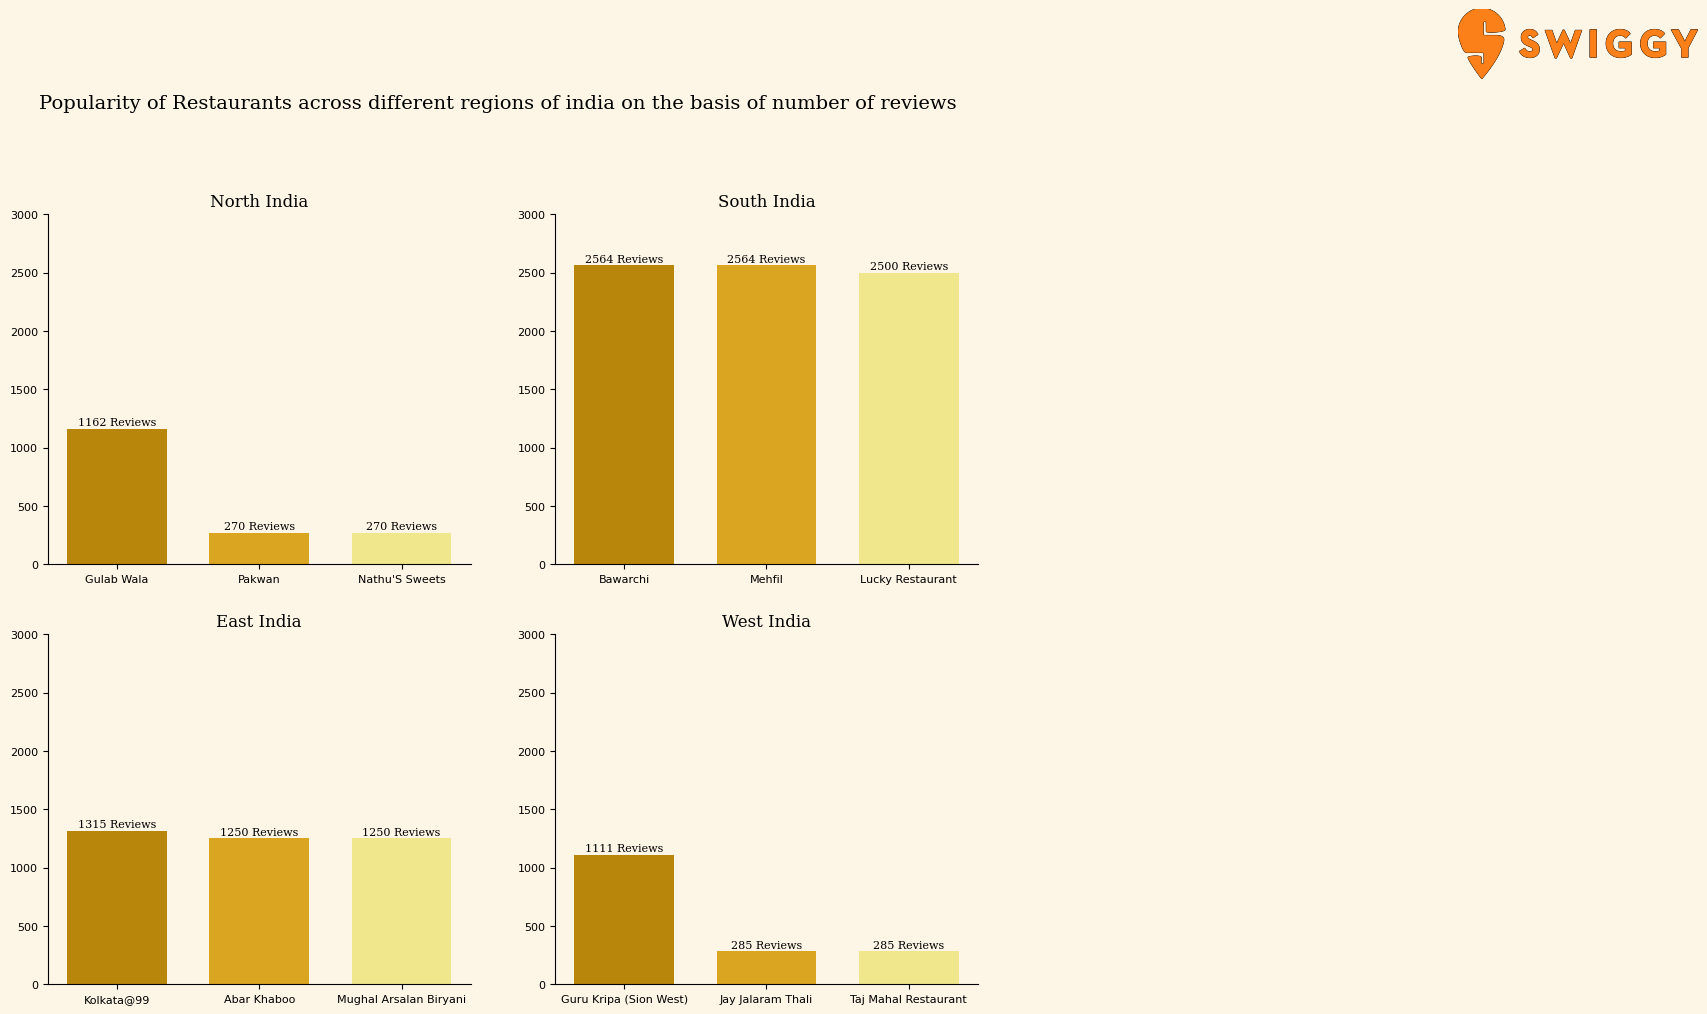

In [101]:
#chart-7
regions=['North India','South India','East India','West India']
fig,ax=plt.subplots(2,2,figsize=(12,10),gridspec_kw={'hspace':0.2})
for subplot_ax,i in zip(ax.flat,regions):
    #subtitle
    subplot_ax.set_title(f'{i}',fontsize=12,fontfamily='serif')
    #color palette
    palette=['darkgoldenrod','goldenrod','khaki']
    w1=data[data['Region_of_india']==i].groupby('Restaurant')
    w=w1['Number of reviews'].max().sort_values(ascending=False).reset_index().head(3)
    #bar plot
    subplot_ax.bar(w['Restaurant'],w['Number of reviews'],color=palette,width=0.7) 
    subplot_ax.set_ylim(0,3000)
    #value counts on each patches
    for p in subplot_ax.patches:
        height=p.get_height()
        subplot_ax.text(p.get_x() + p.get_width()/2,height+10,f'{int(height)} Reviews',ha='center',va='bottom',fontsize=8,color='black',fontfamily='serif')
    subplot_ax.tick_params(axis='x',labelsize=8)
    subplot_ax.tick_params(axis='y',labelsize=8)
    
    #apply styling
    fig.patch.set_facecolor('oldlace')
    subplot_ax.set_facecolor('oldlace')
    logo=mpimg.imread('swiggy_logo.png')
    logo_ax=fig.add_axes([1.3,0.9,0.2,0.3])
    logo_ax.imshow(logo)
    logo_ax.axis('off')
    
    for spine in['top','right']:
        subplot_ax.spines[spine].set_visible(False)

#title
fig.suptitle(x=0.5,y=1,t='Popularity of Restaurants across different regions of india on the basis of number of reviews',fontsize=14,fontfamily='serif',fontweight=19)
plt.tight_layout()
plt.show()

**Insights:**
South India dominates in restaurant popularity, with Bawarchi, Mehfil, and Lucky Restaurant all surpassing 2500 reviews,
suggesting a highly active food culture and strong customer engagement in the region. East India follows moderately 
with restaurants like Kolkata@99 and Arsalan Biryani drawing around 1250 reviews, indicating a fair level of popularity.
In contrast, North India lags behind, where only Gulab Wala crosses 1000 reviews while others remain much lower,
and West India records the least reviews overall, with only Guru Kripa reaching 1111 while others barely exceed 285,
reflecting comparatively weaker customer activity in these regions.